<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/LINEALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Linealization

Name: Juan Manuel G.G

Date: February 2021

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [9]:
# function that returns dz/dt
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -x1**2 + np.sqrt(u)
    dx2dt = -4.0*(x2-2.0) + (1.0/8.0)*(u-16.0)
    dzdt = [dx1dt,dx2dt]
    return dzdt

In [10]:
# steady state conditions
x_ss = 2.0
u_ss = 16.0

# initial condition
z0 = [x_ss,x_ss]

# final time
tf = 10

# number of time points
n = tf * 10 + 1

# time points
t = np.linspace(0,tf,n)

In [16]:
# step input
u = np.ones(n) * u_ss
# magnitude of step
m = 1.0
# change up m at time = 1.0
u[11:] = u[11:] + m
# change down 2*m at time = 4.0
u[41:] = u[41:] - 2.0 * m
# change up m at time = 7.0
u[71:] = u[71:] + m

In [17]:
# store solution
x1 = np.empty_like(t)
x2 = np.empty_like(t)

In [18]:
# record initial conditions
x1[0] = z0[0]
x2[0] = z0[1]
# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    # next initial condition
    z0 = z[1]

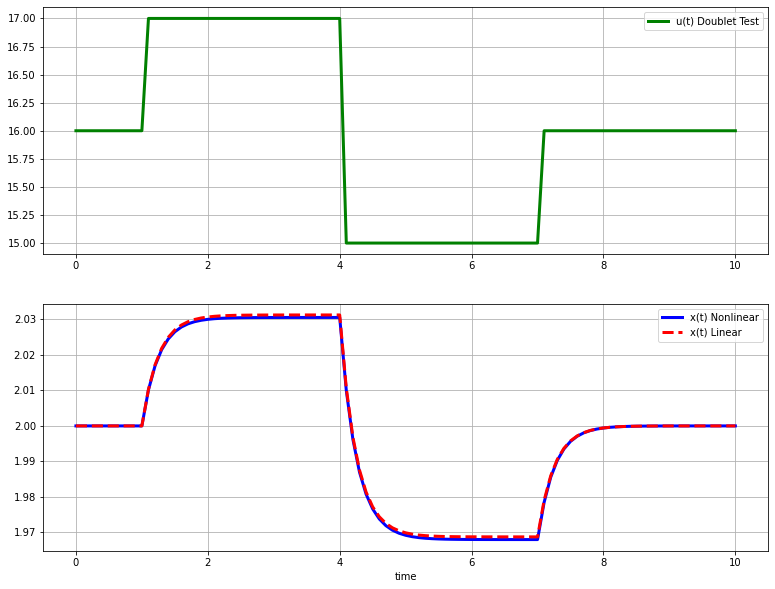

In [19]:
# plot results
plt.figure(1, figsize=(13,10))
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) Doublet Test')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) Nonlinear')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Linear')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()